# DataSet Information
 timestamp,
 TempMax, TempMin, TempMean in Centigrade scale
 RelHumMax, RelHumMin, RelHumMean in %
 WindGustMax, WindGustMin, WindGustMean in m/s
 WindSpeedMax, WindSpeedMin, WindSpeedMean  in m/s
 SunShDurMin in m
 ShWaveRad, UVRad  W/m2
 Evapotranspiration  mm
 zone output class

Data Mining: Selecting Data > Preprocessing Data > Transforming Data > Storing Data > Mining Data > Evaluating Mining *Results*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize, label_binarize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, f1_score, recall_score
from sklearn.metrics import classification_report, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DhakaDailyP.csv to DhakaDailyP.csv


In [3]:
data = pd.read_csv("DhakaDailyP.csv")
data.shape

(3697, 18)

In [4]:
data

,Date,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean,WindGustMax,WindGustMin,WindGustMean,WindSpeedMax,WindSpeedMin,WindSpeedMean,SunShDurMin,ShWaveRad,UVRad,Evapotranspiration,zone
0,1,25.600426,12.240426,18.155424,94.579930,50.815685,79.600460,6.2,3.1,4.204167,2.707397,1.552418,2.151222,643.38180,4382,466.08000,1.929600,1
1,2,23.050425,11.370426,16.619590,97.318700,47.404877,76.390050,6.7,3.2,4.470833,2.780288,1.676306,2.273954,639.53937,4540,469.00003,2.210400,1
2,3,23.050425,11.590426,15.811260,97.971664,51.919422,82.926390,6.5,2.7,4.304167,2.402082,1.697056,2.066819,632.07730,4516,469.73000,1.902240,1
3,4,22.810425,11.910426,15.826259,97.267784,56.197530,84.282970,5.4,2.2,3.791667,2.549510,1.300000,1.926554,505.73710,4358,465.78998,1.870560,1
4,5,21.390425,12.350426,16.073760,99.875690,63.875580,87.653720,4.6,1.9,3.154166,2.080865,0.424264,1.458186,127.57086,2380,261.61002,1.018080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,3693,27.870424,14.410426,19.789177,93.989080,36.841496,74.684410,5.3,2.9,4.004167,2.700000,1.456022,2.053184,668.63340,5411,578.44000,2.818080,1
3693,3694,28.230425,13.930426,20.120424,95.306335,32.459953,71.647310,5.3,1.6,3.450000,2.801785,1.000000,2.003868,623.37006,5389,585.98000,2.894400,2
3694,3695,28.470425,14.100426,21.511260,98.356926,33.007755,67.256160,5.1,1.2,3.220834,2.473863,0.583095,1.757366,546.60020,5310,582.47003,2.975040,2
3695,3696,28.570425,16.110424,21.699175,96.244020,39.720676,74.035576,4.6,2.0,3.229166,2.102380,0.943398,1.531127,497.14750,4800,552.63000,2.610720,2


# Data Preparation

In [5]:
#Train-Test split for regression
x = data.drop(columns=['TempMean', 'zone'])
y = data['TempMean']
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state = 42)

# Modelling Multiple Linear regression

In [6]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [7]:
y_mlr = reg_model.predict(x_test)

In [ ]:
# The coefficients
print ('Coefficients: ', reg_model.coef_)
print ('Intercept: ',reg_model.intercept_)

Coefficients:  [-0.00608074  1.90161645  2.36090107  0.16926685  0.98180061 -0.91253803
  0.0258652  -0.0421399  -0.07294904 -0.06660328  0.00391746  0.04455779
 -0.04313556 -0.13903403 -0.00354253  0.21716751]
Intercept:  25.722034286402


In [8]:
# Evaluate the model # Explained variance score: 1 is perfect prediction
print('Multiple Linear Regression Model Results:')
print('Model Accuracy      = ' + str(reg_model.score(x_train, y_train)))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_mlr)))
print('Mean squared error  = ' + str(mean_squared_error(y_test, y_mlr)))
print("root mean squared e = " + str(np.sqrt(mean_squared_error(y_test, y_mlr))))
print('R2 score            = ' + str(r2_score(y_test, y_mlr)))
print("CossVal             = " + str(np.mean(cross_val_score(reg_model, x_test, y_test, cv=10, scoring='r2'))))

Multiple Linear Regression Model Results:
Model Accuracy      = 0.9955644789301863
Mean absolute error = 0.22472967408251315
Mean squared error  = 0.08724270985989832
root mean squared e = 0.2953687692697018
R2 score            = 0.9957385743665129
CossVal             = 0.9955798308848693


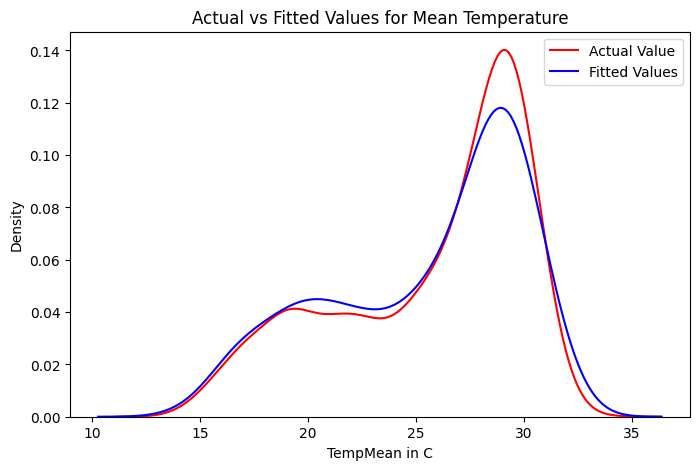

In [9]:
plt.figure(figsize=(8, 5))

ax1 = sns.distplot(data['TempMean'], hist=False, color="r", label="Actual Value")
sns.distplot(y_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature')
plt.xlabel('TempMean in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

In [10]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on Z and transform it
x_imputed = imputer.fit_transform(x)

# Fit the model using the imputed data
reg_model.fit(x_imputed, y)


LinearRegression()

In [11]:
# Split the imputed data into training and testing sets
x_train_imputed, x_test_imputed, y_train_imputed, y_test_imputed = train_test_split(x_imputed, y, test_size=0.2, random_state=42)

# Fit the model on the imputed training data
reg_model.fit(x_train_imputed, y_train_imputed)

# Predict on the imputed test data
y_imlr = reg_model.predict(x_test_imputed)

# Evaluate the model # Explained variance score: 1 is perfect prediction
print('Multiple Linear Regression Model Results:')
print('Model Accuracy      = ' + str(reg_model.score(x_train, y_train)))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_mlr)))
print('Mean squared error  = ' + str(mean_squared_error(y_test, y_mlr)))
print("root mean squared e = " + str(np.sqrt(mean_squared_error(y_test, y_mlr))))
print('R2 score            = ' + str(r2_score(y_test, y_mlr)))
print("CossVal             = " + str(np.mean(cross_val_score(reg_model, x_test, y_test, cv=10, scoring='r2'))))

Multiple Linear Regression Model Results:
Model Accuracy      = -30.875640974750407
Mean absolute error = 0.22472967408251315
Mean squared error  = 0.08724270985989832
root mean squared e = 0.2953687692697018
R2 score            = 0.9957385743665129
CossVal             = 0.9955798308848693


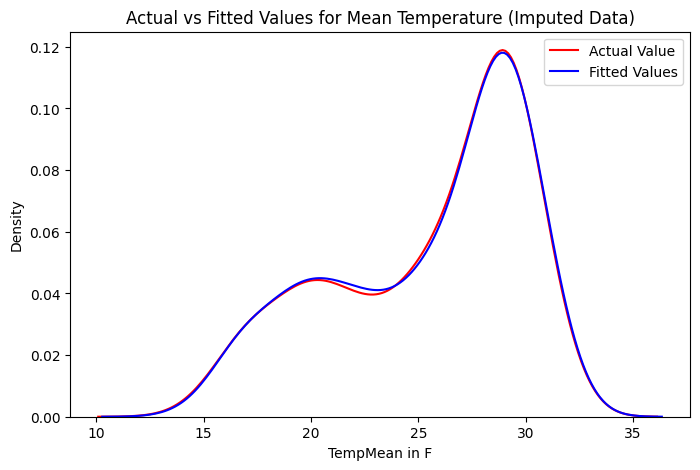

In [12]:
plt.figure(figsize=(8, 5))

ax1 = sns.distplot(y_test_imputed, hist=False, color="r", label="Actual Value")
sns.distplot(y_imlr, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature (Imputed Data)')
plt.xlabel('TempMean in F')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

Explained variance regression score:
Let  y^  be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

explainedVariance(y,y^)=1−Var{y−y^}/Var{y}
The best possible score is 1.0, the lower values are worse.

In [ ]:
#data.loc[data['TempMax'].idxmin()]

# Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2)
poly

PolynomialFeatures()

In [15]:
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[ 1.00000000e+00,  9.73546581e-01, -4.97172110e-01, ...,
         1.17937449e-01,  2.95043443e-01,  7.38108494e-01],
       [ 1.00000000e+00,  8.12381988e-01,  4.92391544e-01, ...,
         3.08135138e-01,  2.77827661e-01,  2.50501159e-01],
       [ 1.00000000e+00, -9.65113550e-01,  3.65241183e-01, ...,
         4.46345541e-04,  1.69449690e-03,  6.43295264e-03],
       ...,
       [ 1.00000000e+00, -9.25759405e-01,  1.23318221e+00, ...,
         4.66776606e+00,  4.27090624e+00,  3.90778799e+00],
       [ 1.00000000e+00,  1.55448872e+00,  3.87353784e-01, ...,
         9.21674608e-03, -2.86229347e-02,  8.88895476e-02],
       [ 1.00000000e+00,  1.24246657e+00, -1.37833630e-01, ...,
         1.58226920e+00, -1.04359844e-01,  6.88313789e-03]])

In [16]:
reg_model = LinearRegression()
reg_model.fit(train_x_poly,y_train)

LinearRegression()

In [17]:
# The coefficients
print ('Coefficients: ', reg_model.coef_)
print ('Intercept: ',reg_model.intercept_)

Coefficients:  [-6.12789435e-17 -2.69443762e-03  1.78286281e+00  2.38548718e+00
  1.47555279e-01  8.82924796e-01 -8.67253872e-01  3.33313182e-03
 -8.31952927e-02  1.21026458e-02 -6.30278501e-02  3.31461404e-02
 -3.36837774e-02 -3.34831354e-02 -2.76830628e-01  1.70405707e-01
  2.28097405e-01 -1.52007603e-02 -5.62314489e-02  5.75965868e-02
 -2.19076683e-02 -4.67215140e-02  2.87024496e-02 -1.14367506e-02
  5.35345942e-02 -3.99378899e-02  5.95899680e-02 -1.64566407e-02
 -5.00087660e-02 -1.27997472e-02  1.76804564e-02  1.76492632e-02
 -1.70683370e-02  1.93490577e-01 -7.07577040e-01  8.51085491e-02
  4.04872166e-01 -3.30772572e-01  1.17064263e-01 -1.44331720e-01
 -1.51459603e-01 -1.22777223e-01  5.49148777e-02  1.59134539e-01
  2.46676390e-02 -1.84321405e-01  1.00745836e-01  4.06551193e-02
  5.90468856e-01 -1.13461139e-01 -5.94514538e-01  4.78964793e-01
 -2.29706029e-01  1.71603049e-01  2.39750525e-01  1.28578023e-01
 -7.27884193e-02 -1.38507665e-01 -4.43333739e-02  5.87434121e-01
 -3.243809

In [18]:
test_x_poly = poly.transform(x_test)
y_pol = reg_model.predict(test_x_poly)

In [19]:
# Evaluate the model # Explained variance score: 1 is perfect prediction
print('Polynomial Regression Model Results:')
print('Model Accuracy      = ' + str(reg_model.score(train_x_poly, y_train)))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_pol)))
print('Mean squared error  = ' + str(mean_squared_error(y_test, y_pol)))
print("root mean squared e = " + str(np.sqrt(mean_squared_error(y_test, y_pol))))
print('R2 score            = ' + str(r2_score(y_test, y_pol)))
print("CossVal             = " + str(np.mean(cross_val_score(reg_model, test_x_poly, y_test, cv=10, scoring='r2'))))


Polynomial Regression Model Results:
Model Accuracy      = 0.9966481373106836
Mean absolute error = 0.20321094721023178
Mean squared error  = 0.07224222319563764
root mean squared e = 0.2687791345987215
R2 score            = 0.9964712826751901
CossVal             = 0.9950873966559867


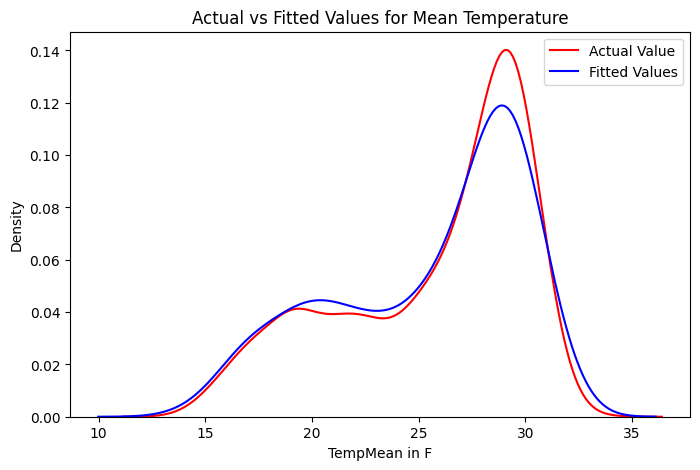

In [20]:
plt.figure(figsize=(8, 5))

ax1 = sns.distplot(data['TempMean'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pol, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature')
plt.xlabel('TempMean in F')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

# Random Forest Regression


In [21]:
# Initialize Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_rf = rf_model.predict(x_test)

In [22]:
# Evaluate the model   # Explained variance score: 1 is perfect prediction
print('Random Forest Regression Model Results:')
print('Model Accuracy      = ' + str(rf_model.score(x_train, y_train)))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_rf)))
print('Mean squared error  = ' + str(mean_squared_error(y_test, y_rf)))
print("root mean squared e = " + str(np.sqrt(mean_squared_error(y_test, y_rf))))
print('R2 score            = ' + str(r2_score(y_test, y_rf)))
print("CossVal             = " + str(np.mean(cross_val_score(rf_model, x_test, y_test, cv=10, scoring='r2'))))

Random Forest Regression Model Results:
Model Accuracy      = 0.999014950763988
Mean absolute error = 0.2918655244599104
Mean squared error  = 0.15605110222735827
root mean squared e = 0.39503303941234874
R2 score            = 0.9923775846917928
CossVal             = 0.9895384079454417


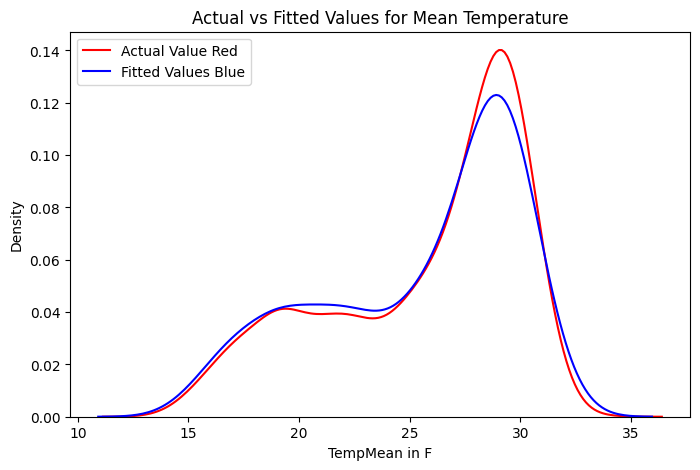

In [23]:
plt.figure(figsize=(8, 5))

ax1 = sns.distplot(data['TempMean'], hist=False, color="r", label="Actual Value Red")
sns.distplot(y_rf, hist=False, color="b", label="Fitted Values Blue" , ax=ax1)

plt.title('Actual vs Fitted Values for Mean Temperature')
plt.xlabel('TempMean in F')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

# Logistic regressionCV

In [24]:
#Train-Test split for classification
x = data.drop(columns=['TempMean', 'zone'])
z= data['zone']
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)
x_train, x_test, z_train, z_test = train_test_split(x_std, z, test_size=0.2, random_state = 42)

In [26]:
# Train Logistic Regression Model
#model = LogisticRegression(multi_class='ovr', solver='liblinear')
#model = LogisticRegressionCV()
model = LogisticRegressionCV(max_iter=1000, class_weight='balanced', solver='saga')
model.fit(x_train, z_train)

# Make Predictions
z_lr = model.predict(x_test)


In [27]:
# AUC calculation for classification models
def auccalc(model, x_test, z_test):
  # Predict probabilities
  z_score = model.predict_proba(x_test)

  # Binarize the test labels for AUC calculation
  z_test_bin = label_binarize(z_test, classes=np.unique(z))

  # Compute AUC using One-vs-Rest
  auc_ovr = roc_auc_score(z_test_bin, z_score, average="macro", multi_class="ovr")

  #print(f"AUC score = {auc_ovr}")
  return(auc_ovr)

In [28]:
# Evaluate Model
print("Classification Report for Logistic Regression:")
print(classification_report(z_test, z_lr))

print('Accuracy  = ' + str(accuracy_score(z_test, z_lr)))
print('Recall    = ' + str(recall_score(z_test, z_lr, average='weighted')))
print('Precision = ' + str(precision_score(z_test, z_lr, average='weighted')))
print('f1_M      = ' + str(f1_score(z_test, z_lr, average='macro' )))
print('f1_m      = ' + str(f1_score(z_test, z_lr, average='micro' )))
print('f1_W      = ' + str(f1_score(z_test, z_lr, average='weighted')))
print('CrossVal  = ' + str(np.mean(cross_val_score(model, x_test, z_test, cv=10))))
print(f"AUC score = {auccalc(model, x_test, z_test)}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       125
           2       0.95      0.95      0.95       155
           3       0.98      0.94      0.96       369
           4       0.85      0.97      0.90        91

    accuracy                           0.95       740
   macro avg       0.94      0.96      0.95       740
weighted avg       0.96      0.95      0.95       740

Accuracy  = 0.9540540540540541
Recall    = 0.9540540540540541
Precision = 0.9565101292789324
f1_M      = 0.9472520076784355
f1_m      = 0.9540540540540541
f1_W      = 0.9545547033478458
CrossVal  = 0.9364864864864865
AUC score = 0.9972212506156788


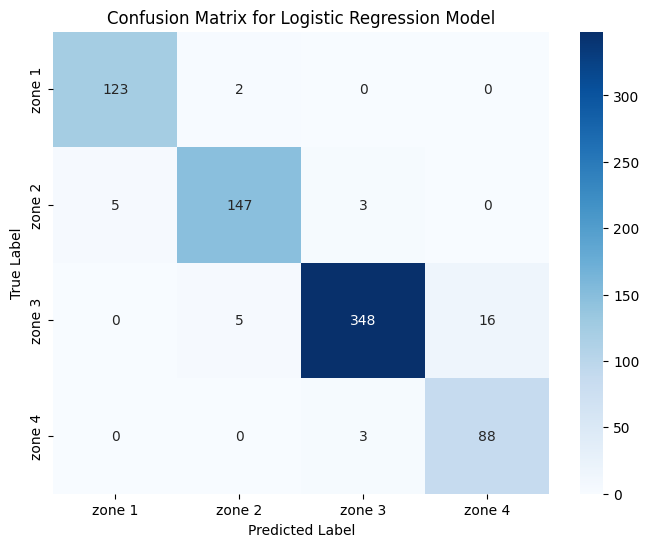

In [29]:
# Compute confusion matrix
cm = confusion_matrix(z_test, z_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.show()

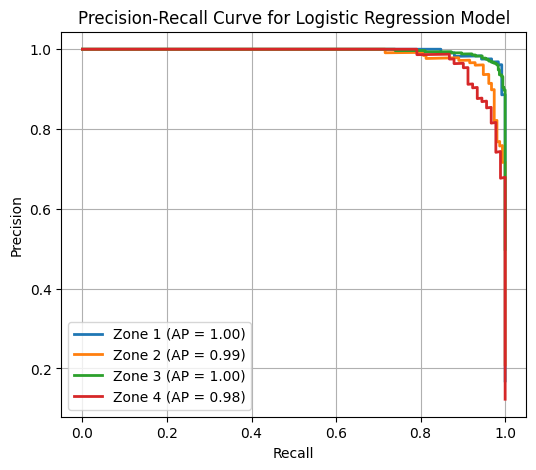

In [30]:
# Predict probabilities for each class
z_scores = model.predict_proba(x_test)

# Binarize the output
z_test_bin = label_binarize(z_test, classes=model.classes_)
n_classes = z_test_bin.shape[1]

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(z_test_bin[:, i], z_scores[:, i])
    average_precision[i] = average_precision_score(z_test_bin[:, i], z_scores[:, i])

# Plot the precision-recall curve for each class
plt.figure(figsize=(6, 5))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Zone {model.classes_[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression Model")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Lasso Logistic regression (classification)


In [31]:
# Creating Lasso logistic regression model
lasso_log_reg = LogisticRegressionCV(penalty='l1', solver='liblinear')  # L1 regularization

# Fitting the model
lasso_log_reg.fit(x_train, z_train)

# Make Predictions
z_ls = lasso_log_reg.predict(x_test)

# Printing model coefficients
print("Lasso Logistic Regression Coefficients:", lasso_log_reg.coef_)

Lasso Logistic Regression Coefficients: [[-1.71460596e-01 -1.04293843e+01 -1.15116098e+01 -8.04558513e-01
  -4.36803577e+00  4.36263260e+00 -1.77228551e-01  6.72952197e-01
   0.00000000e+00  0.00000000e+00  1.92152781e-01  0.00000000e+00
   5.34464015e-02  1.00607490e+00  0.00000000e+00 -8.98752581e-04]
 [-1.63305718e-02  1.29229936e+00 -1.28552835e+00  9.58026784e-02
   2.06145753e-01 -8.74044237e-01  1.25228631e+00 -8.91711760e-02
  -2.04353386e+00 -9.23866608e-03 -4.76752978e-01  6.01535750e-01
  -1.27960056e-01  2.62105488e+00 -4.06046331e+00 -2.66647644e-01]
 [ 0.00000000e+00  0.00000000e+00  1.02096767e+00  0.00000000e+00
   9.95862628e-02  0.00000000e+00  1.81932657e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.98240600e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.88967670e-01  1.26682777e+01  2.09389930e+01  8.97910194e-01
   5.83481560e+00 -5.95195587e+00 -9.47747710e-01 -5.11174095e-01
  -4.60067217e-01  1.49922311e-01

In [32]:
print("Evaluation matrics for Lasso Logistic regression")
print("Classification Report:")
print(classification_report(z_test, z_ls))

print('Accuracy  = ' + str(accuracy_score(z_test, z_ls)))
print('Recall    = ' + str(recall_score(z_test, z_ls, average='weighted')))
print('Precision = ' + str(precision_score(z_test, z_ls, average='weighted')))
print('f1_M      = ' + str(f1_score(z_test, z_ls, average='macro' )))
print('f1_m      = ' + str(f1_score(z_test, z_ls, average='micro' )))
print('f1_W      = ' + str(f1_score(z_test, z_ls, average='weighted')))
print('CrossVal  = ' + str(np.mean(cross_val_score(lasso_log_reg, x_test, z_test, cv=10))))
auccalc(lasso_log_reg, x_test, z_test)

Evaluation matrics for Lasso Logistic regression
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       125
           2       0.81      0.62      0.70       155
           3       0.84      0.94      0.89       369
           4       0.99      0.85      0.91        91

    accuracy                           0.87       740
   macro avg       0.90      0.85      0.87       740
weighted avg       0.87      0.87      0.87       740

Accuracy  = 0.8702702702702703
Recall    = 0.8702702702702703
Precision = 0.8712633892652433
f1_M      = 0.8683738816197331
f1_m      = 0.8702702702702703
f1_W      = 0.8657295934061373
CrossVal  = 0.8621621621621622


np.float64(0.9733458538668804)

# Support vector machine


In [33]:
from sklearn.svm import SVC

In [34]:
# Train SVM Classifier

svm_model = SVC(kernel='linear', C=1.0, probability=True)  # Linear kernel
svm_model.fit(x_train, z_train)

# Make Predictions
z_svm = svm_model.predict(x_test)

In [35]:
print("Evaluation matrics for Support Vector Classification")

# Evaluate Model
print("Classification Report:")
print(classification_report(z_test, z_svm))

print('Accuracy  = ' + str(accuracy_score(z_test, z_svm)))
print('Recall    = ' + str(recall_score(z_test, z_svm, average='weighted')))
print('Precision = ' + str(precision_score(z_test, z_svm, average='weighted')))
print('f1_M      = ' + str(f1_score(z_test, z_svm, average='macro' )))
print('f1_m      = ' + str(f1_score(z_test, z_svm, average='micro' )))
print('f1_W      = ' + str(f1_score(z_test, z_svm, average='weighted')))
print('CrossVal  = ' + str(np.mean(cross_val_score(svm_model, x_test, z_test, cv=10))))
auccalc(svm_model, x_test, z_test)

Evaluation matrics for Support Vector Classification
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       125
           2       0.96      0.95      0.95       155
           3       0.96      0.98      0.97       369
           4       0.95      0.90      0.93        91

    accuracy                           0.96       740
   macro avg       0.96      0.95      0.96       740
weighted avg       0.96      0.96      0.96       740

Accuracy  = 0.9635135135135136
Recall    = 0.9635135135135136
Precision = 0.9634281351509805
f1_M      = 0.9579022289159052
f1_m      = 0.9635135135135136
f1_W      = 0.9633372965839437
CrossVal  = 0.9283783783783784


np.float64(0.9971849323420601)

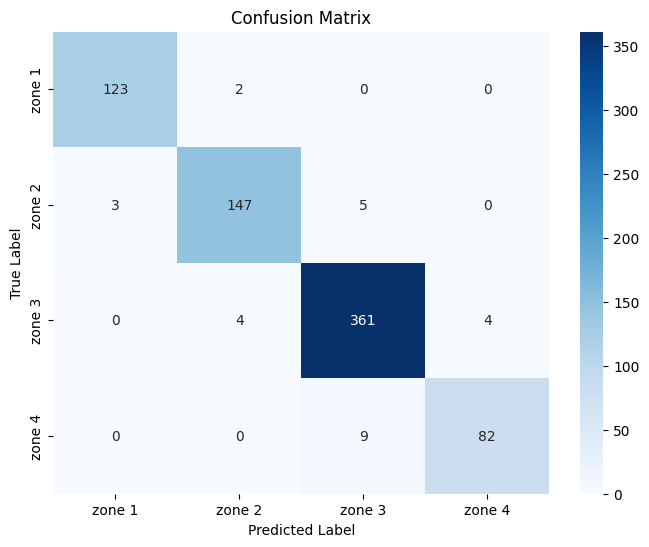

In [36]:
# Compute confusion matrix
cm = confusion_matrix(z_test, z_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.show()

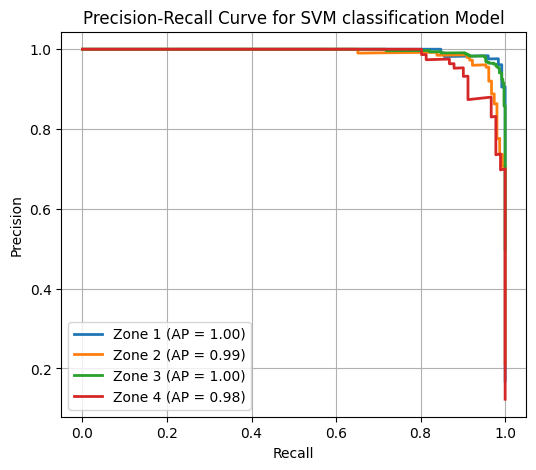

In [37]:
# Predict probabilities for each class
z_scores = svm_model.predict_proba(x_test)

# Binarize the output
z_test_bin = label_binarize(z_test, classes=svm_model.classes_)
n_classes = z_test_bin.shape[1]

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(z_test_bin[:, i], z_scores[:, i])
    average_precision[i] = average_precision_score(z_test_bin[:, i], z_scores[:, i])

# Plot the precision-recall curve for each class
plt.figure(figsize=(6, 5))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Zone {svm_model.classes_[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM classification Model")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Random Forest classifier


In [38]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(x_train, z_train)
# Make predictions
z_rf = rf_model.predict(x_test)

In [39]:
# Evaluate the model # Explained variance score: 1 is perfect prediction
print("Classification Report:")
print(classification_report(z_test, z_rf))

print('Accuracy  = ' + str(accuracy_score(z_test, z_rf)))
print('Recall    = ' + str(recall_score(z_test, z_rf, average='weighted')))
print('Precision = ' + str(precision_score(z_test, z_rf, average='weighted')))
print('f1_M      = ' + str(f1_score(z_test, z_rf, average='macro' )))
print('f1_m      = ' + str(f1_score(z_test, z_rf, average='micro' )))
print('f1_W      = ' + str(f1_score(z_test, z_rf, average='weighted')))
print('CrossVal  = ' + str(np.mean(cross_val_score(rf_model, x_test, z_test, cv=10))))
auccalc(rf_model, x_test, z_test)

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.96      0.94       125
           2       0.95      0.88      0.91       155
           3       0.94      0.98      0.96       369
           4       0.95      0.85      0.90        91

    accuracy                           0.94       740
   macro avg       0.94      0.92      0.93       740
weighted avg       0.94      0.94      0.94       740

Accuracy  = 0.9405405405405406
Recall    = 0.9405405405405406
Precision = 0.9409650122828419
f1_M      = 0.9283249662857229
f1_m      = 0.9405405405405406
f1_W      = 0.9397576126091566
CrossVal  = 0.9216216216216215


np.float64(0.9956181524829419)

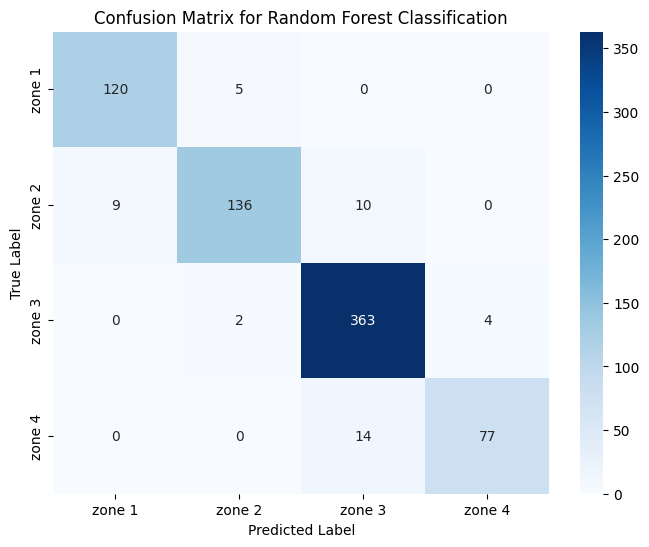

In [40]:
# Compute confusion matrix
cm = confusion_matrix(z_test, z_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classification')
plt.xticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['zone 1', 'zone 2', 'zone 3', 'zone 4'])
plt.show()

# Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(x_train, z_train)

# Make predictions
z_dt = model.predict(x_test)

In [42]:
# Evaluate the model
print("Classification Report:")
print(classification_report(z_test, z_dt))

print('Accuracy  = ' + str(accuracy_score(z_test, z_dt)))
print('Recall    = ' + str(recall_score(z_test, z_dt, average='weighted')))
print('Precision = ' + str(precision_score(z_test, z_dt, average='weighted')))
print('f1_M      = ' + str(f1_score(z_test, z_dt, average='macro' )))
print('f1_m      = ' + str(f1_score(z_test, z_dt, average='micro' )))
print('f1_W      = ' + str(f1_score(z_test, z_dt, average='weighted')))
print('CrossVal  = ' + str(np.mean(cross_val_score(model, x_test, z_test, cv=10))))
auccalc(model, x_test, z_test)

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.96      0.93       125
           2       0.92      0.84      0.88       155
           3       0.92      0.95      0.94       369
           4       0.88      0.80      0.84        91

    accuracy                           0.91       740
   macro avg       0.90      0.89      0.89       740
weighted avg       0.91      0.91      0.91       740

Accuracy  = 0.9121621621621622
Recall    = 0.9121621621621622
Precision = 0.911880050490881
f1_M      = 0.8949522321246459
f1_m      = 0.9121621621621622
f1_W      = 0.9111414504857189
CrossVal  = 0.8972972972972973


np.float64(0.9272480667951778)

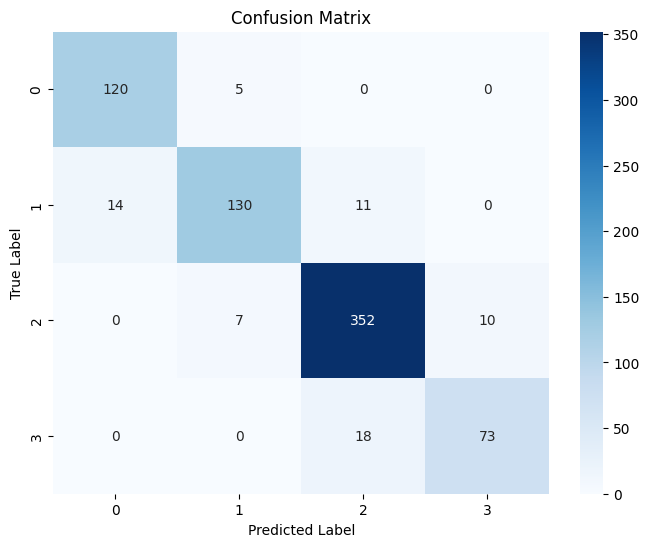

In [43]:
# Compute confusion matrix
cm = confusion_matrix(z_test, z_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Comparing

In [44]:
# Starting Model Posibilities
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegressionCV as LgR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.svm import SVR


# Score Model
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np # Import numpy for np.sqrt

modelsR = {
    'LinearRegression': LR(),
    'RandomForestRegressor': RFR(n_estimators=100, random_state=42),
    'DecisionTreeRegressor': DTR(),
    'SupportVectorRegressor': SVR(kernel='linear')
}

modelsC = {
    'SupportVectorClassifier': SVC(kernel='linear', C=1.0, probability= True) ,
    'LogisticRegressionCV': LgR(max_iter=1000), # it's a classification model
    'DecisionTreeClassifier': DTC(),
    'RandomForestClassifier': RFC(n_estimators=100, random_state=42)
}


In [45]:
def train_scoreC(models, x_train, z_Train, x_test, z_test):
    ret = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1_Score_M', 'F1_Score_m', 'F1_Score_W', 'CrossVal', 'AUC'])
    ret.index.name = 'Model'

    # Train & Eval Model
    for name, model in modelsC.items():
        model.fit(x_train, z_Train)

        z_pred = model.predict(x_test)

        f1_m = f1_score(z_test, z_pred, average='micro' )
        f1_M = f1_score(z_test, z_pred, average='macro' )
        f1_W = f1_score(z_test, z_pred, average='weighted') # Changed from binary to weighted
        acc = accuracy_score(z_test, z_pred)
        rec = recall_score(z_test, z_pred, average='weighted') # Added average='weighted' for recall score as well
        prec = precision_score(z_test, z_pred, average='weighted') # Added average='weighted' for precision score as well
        cross = np.mean(cross_val_score(model, x_test, z_test, cv=10))
        AUC = auccalc(model, x_test, z_test)
        ret.loc[name] = pd.Series({'Accuracy': acc, 'Recall': rec, 'Precision': prec, 'F1_Score_M': f1_M, 'F1_Score_m': f1_m, 'F1_Score_W': f1_W, 'CrossVal': cross, 'AUC': auccalc(model, x_test, z_test)})

    return ret.sort_values(['CrossVal', 'F1_Score_W', 'Accuracy', 'Recall'], ascending=False)

In [46]:
print(train_scoreC(modelsC, x_train, z_train, x_test, z_test))

                         Accuracy    Recall  Precision  F1_Score_M  \
Model                                                                
SupportVectorClassifier  0.963514  0.963514   0.963428    0.957902   
LogisticRegressionCV     0.962162  0.962162   0.962136    0.955747   
RandomForestClassifier   0.940541  0.940541   0.940965    0.928325   
DecisionTreeClassifier   0.901351  0.901351   0.900984    0.882388   

                         F1_Score_m  F1_Score_W  CrossVal       AUC  
Model                                                                
SupportVectorClassifier    0.963514    0.963337  0.928378  0.997188  
LogisticRegressionCV       0.962162    0.962061  0.928378  0.997337  
RandomForestClassifier     0.940541    0.939758  0.921622  0.995618  
DecisionTreeClassifier     0.901351    0.899962  0.890541  0.917640  


In [47]:
def train_scoreR(models, x_train, y_train, x_test, y_test):
    ret = pd.DataFrame(columns=['ACCURACY', 'MAE', 'MSE', 'RMSE', 'R2score', 'CrossVal'])
    ret.index.name = 'Model'

    # Train & Eval Model
    for name, model in modelsR.items():
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
        M_AC = model.score(x_train, y_train)
        MAE = mean_absolute_error(y_test, y_pred)
        MSE = mean_squared_error(y_test, y_pred)
        RMSE = np.sqrt(MSE)
        R2score = r2_score(y_test, y_pred)
        cross = np.mean(cross_val_score(model, x_test, y_test, cv=10, scoring='r2'))
        ret.loc[name] = pd.Series({'ACCURACY': M_AC, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 'R2score': R2score, 'CrossVal': cross})

    return ret.sort_values(['CrossVal', 'R2score'], ascending=False)

In [48]:
print(train_scoreR(modelsR, x_train, y_train, x_test, y_test))

                        ACCURACY       MAE       MSE      RMSE   R2score  \
Model                                                                      
LinearRegression        0.995564  0.224730  0.087243  0.295369  0.995739   
SupportVectorRegressor  0.995537  0.224708  0.087815  0.296336  0.995711   
RandomForestRegressor   0.999015  0.291866  0.156051  0.395033  0.992378   
DecisionTreeRegressor   1.000000  0.423719  0.327685  0.572438  0.983994   

                        CrossVal  
Model                             
LinearRegression        0.995580  
SupportVectorRegressor  0.995546  
RandomForestRegressor   0.989538  
DecisionTreeRegressor   0.975266  


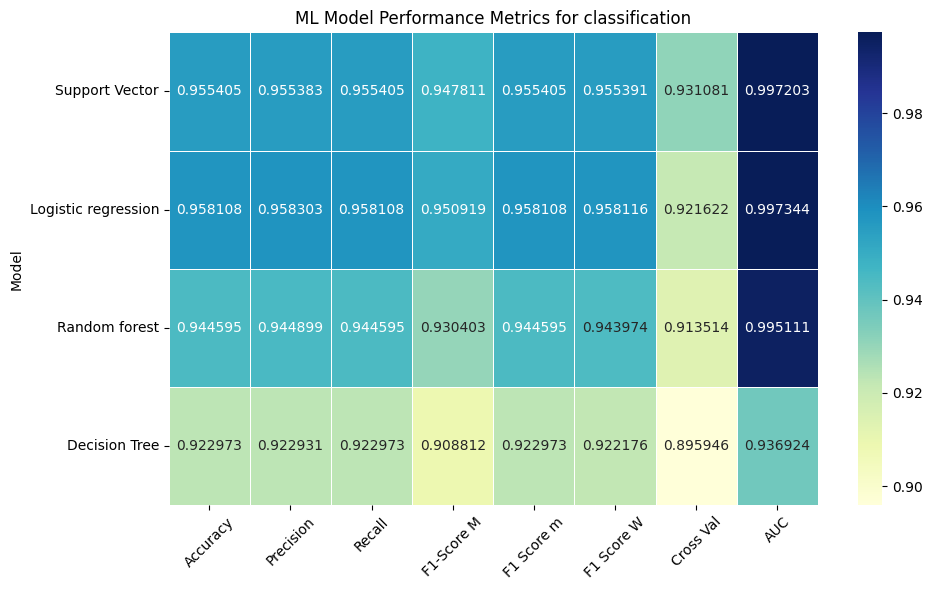

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {
    "Model": ["Support Vector", "Logistic regression", "Random forest", "Decision Tree"],
    "Accuracy": [0.955405, 0.958108, 0.944595, 0.922973],
    "Precision": [0.955383, 0.958303, 0.944899, 0.922931],
    "Recall": [0.955405, 0.958108, 0.944595, 0.922973],
    "F1-Score M": [0.947811, 0.950919, 0.930403, 0.908812],
    "F1 Score m": [0.955405, 0.958108, 0.944595, 0.922973],
    "F1 Score W": [0.955391, 0.958116, 0.943974, 0.922176],
    "Cross Val": [0.931081, 0.921622, 0.913514, 0.895946],
    "AUC": [0.997203, 0.997344, 0.995111, 0.936924]
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index("Model", inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".6f", linewidths=0.5)
plt.title("ML Model Performance Metrics for classification")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





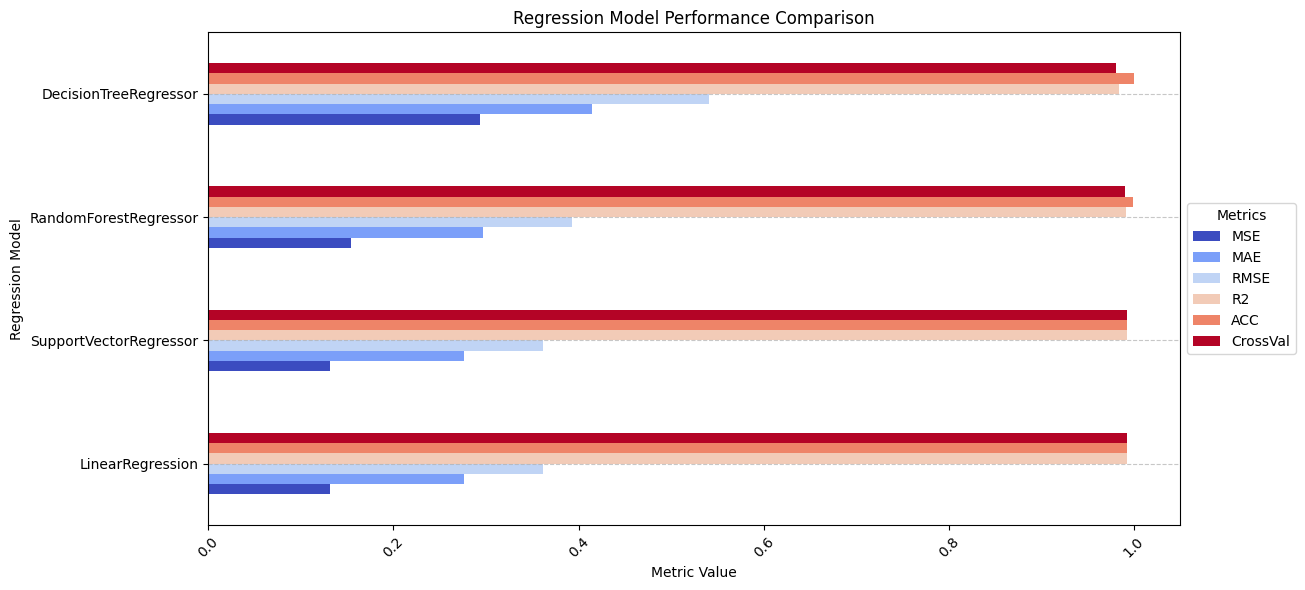

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the regression model results
data = {
    "Model": [
        "LinearRegression",
        "SupportVectorRegressor",
        "RandomForestRegressor",
        "DecisionTreeRegressor"
    ],
    "MSE": [0.130967, 0.131127, 0.154241, 0.293071],
    "MAE": [0.276664, 0.275736, 0.296862, 0.414535],
    "RMSE": [0.361893, 0.362114, 0.392736, 0.541360],
    "R2": [0.992691, 0.992682, 0.991392, 0.983644],
    "ACC": [0.992258, 0.992229, 0.998748, 1.000000],
    "CrossVal": [0.992620, 0.992585, 0.990057, 0.980982]

}

df = pd.DataFrame(data)
df.set_index("Model", inplace=True)

# Plotting the bar chart for each metric
df.plot(kind='barh', figsize=(12, 6), colormap='coolwarm')
plt.ylabel("Regression Model")
plt.title("Regression Model Performance Comparison")
plt.xlabel("Metric Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Metrics", loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()